<a href="https://colab.research.google.com/github/Sxbxn/Data_Mining-Study/blob/main/K-means_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [49]:
url = 'https://raw.githubusercontent.com/Sxbxn/Data_Mining-Study/main/data/winequality-red.csv'
data = pd.read_csv(url)
x = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].values

In [50]:
print(data)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(x)
data_scaled = pd.DataFrame(result)
data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16,-8.051373e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,-3.265165e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,-7.878226e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,4.508484e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,4.508484e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,2.928190e+00


In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result, columns=["x", "y"])
result

,x,y
0,-1.779442,1.157303
1,-1.004185,2.071838
2,-0.915783,1.393434
3,2.404077,-0.213792
4,-1.779442,1.157303
...,...,...
1594,-2.241991,0.599594
1595,-2.122456,-0.370101
1596,-1.366265,-0.517561
1597,-2.367147,0.703545


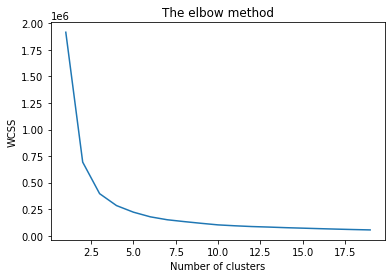

In [67]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 20), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## 10
0.3325

In [58]:
feature = result[['x','y']]

model = KMeans(n_clusters=10, algorithm='auto') # 10개를 cluster 데이터로 군집화
model.fit(feature)
predict = pd.DataFrame(model.predict(feature)) 
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1)
r

,x,y,predict
0,-1.779442,1.157303,2
1,-1.004185,2.071838,7
2,-0.915783,1.393434,7
3,2.404077,-0.213792,0
4,-1.779442,1.157303,2
...,...,...,...
1594,-2.241991,0.599594,2
1595,-2.122456,-0.370101,1
1596,-1.366265,-0.517561,1
1597,-2.367147,0.703545,2


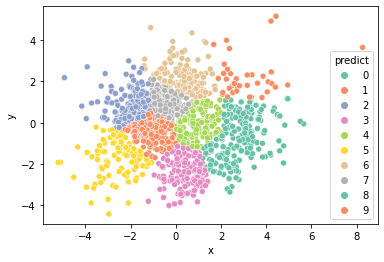

In [60]:
sns.scatterplot(x="x", y="y", hue="predict", data=r, palette="Set2");

In [59]:
from sklearn.metrics import silhouette_score
score = silhouette_score(feature, predict)
print(score)

0.3325731727175666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##5
0.3467

In [61]:
feature = result[['x','y']]

model5 = KMeans(n_clusters=5, algorithm='auto') 
model5.fit(feature)
predict = pd.DataFrame(model5.predict(feature)) 
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1)
r

,x,y,predict
0,-1.779442,1.157303,4
1,-1.004185,2.071838,0
2,-0.915783,1.393434,4
3,2.404077,-0.213792,3
4,-1.779442,1.157303,4
...,...,...,...
1594,-2.241991,0.599594,4
1595,-2.122456,-0.370101,4
1596,-1.366265,-0.517561,4
1597,-2.367147,0.703545,4


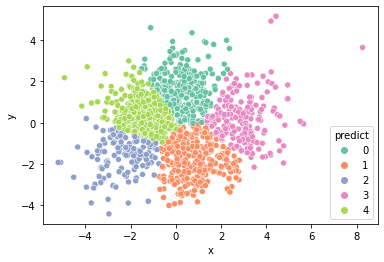

In [63]:
sns.scatterplot(x="x", y="y", hue="predict", data=r, palette="Set2");

In [62]:
from sklearn.metrics import silhouette_score
score = silhouette_score(feature, predict)
print(score)

0.34675085316237236


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 20
0.3432

In [64]:
feature = result[['x','y']]

model20 = KMeans(n_clusters=20, algorithm='auto') # 4개를 cluster 데이터로 군집화
model20.fit(feature)
predict = pd.DataFrame(model20.predict(feature)) #feature에 대한 clustering value DataFrame
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1) # 두 DataFrame을 합침
r

,x,y,predict
0,-1.779442,1.157303,14
1,-1.004185,2.071838,16
2,-0.915783,1.393434,16
3,2.404077,-0.213792,4
4,-1.779442,1.157303,14
...,...,...,...
1594,-2.241991,0.599594,2
1595,-2.122456,-0.370101,13
1596,-1.366265,-0.517561,11
1597,-2.367147,0.703545,2


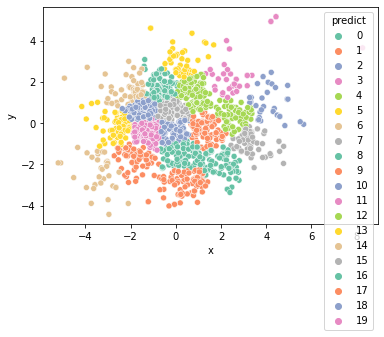

In [66]:
sns.scatterplot(x="x", y="y", hue="predict", data=r, palette="Set2");

In [65]:
from sklearn.metrics import silhouette_score
score = silhouette_score(feature, predict)
print(score)

0.3432729958067455


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
